In [1]:
#pip install tensorflow
#pip install keras

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date, timezone

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import AveragePooling1D
from keras.layers import Dropout

In [3]:
# загрузим исходные данные о покупках
data = pd.read_csv('train.csv', sep=';', index_col='date', parse_dates=['date'], dayfirst=True)
data

,region,oktmo,okato,pasta,legumes,bread,flour,rice,groats,potatoes,...,spice_value,tea_value,ai92,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value
date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,72,71000000000,71000000000,"86,36","108,63","75,1","34,06","81,14","65,37","43,83",...,"40 875,05","44 193,60","43,4","48,18","54,85","50,18","738 049,00","438 485,91","3 182,57","66 982,78"
2021-03-31,75,76000000000,76000000000,"83,48","123,53","73,87","42,34","65,98","50,66","50,86",...,"21 705,41","26 263,81","49,09","50,63","53,71","53,58","350 912,44","144 884,38","7 341,17","36 931,85"
2021-03-31,74,75000000000,75000000000,"75,59","103,61","81,43","33,27","77,01","70,49","39,78",...,"75 719,70","86 481,15","42,12","45,94","49,85","48,41","1 001 103,38","559 145,81","23,55","163 207,48"
2021-03-31,73,73000000000,73000000000,"73,77","87,81","76,34","32,33","72,69","69,96","38,12",...,"27 386,71","25 340,40","43,41","47,01","47,94","46,93","400 342,50","161 002,06","6 391,44","66 398,72"
2021-03-31,65,64000000000,64000000000,"132,15","123,6","109,73","50,71","24,65","20,25","42,23",...,"14 260,44","10 247,91","51,71","51,23","58,18","59,31","262 623,69","157 463,67","27 128,07","10 191,43"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,28,10000000000,10000000000,"88,84","125,47","48,04","33,4","65,57","43,56","29,38",...,"3 313,00","2 147,00","41,59","43,96","46,29","49,64","190 836,19","101 768,91","2 143,36","798,8"
2019-01-01,67,66000000000,66000000000,"69,65","86,71","64,97","33,76","68,42","36,96","26,1",...,"3 618,00","5 465,00","40,99","44,64","47,6","45,93","194 608,50","136 163,13","791,57","39 200,50"
2019-01-01,66,65000000000,65000000000,"72,51","91,91","58,99","32,98","74,34","41,06","22,67",...,"26 507,71","34 152,85","40,32","43,46","48,17","46,13","814 581,88","562 791,31","348,24","91 853,09"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69785 entries, 2021-03-31 to 2019-01-01
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   region                    69785 non-null  int64 
 1   oktmo                     69785 non-null  int64 
 2   okato                     69785 non-null  int64 
 3   pasta                     69785 non-null  object
 4   legumes                   69785 non-null  object
 5   bread                     69785 non-null  object
 6   flour                     69785 non-null  object
 7   rice                      69785 non-null  object
 8   groats                    69785 non-null  object
 9   potatoes                  69785 non-null  object
 10  сucumbers_tomatoes        69785 non-null  object
 11  vegetables                69785 non-null  object
 12  roots                     69785 non-null  object
 13  сabbage                   69785 non-null  object
 14  fruit

In [5]:
# приведем данные в порядок: для преобразования нужно почистить числовые данные
data_ = data[['region', 'oktmo', 'okato']]
data.drop(['region', 'oktmo', 'okato'], axis=1, inplace=True)

columns = data.columns
for i in range(len(columns)):
    if isinstance(data[columns[i]][0], str):
        #print(columns[i])
        data[columns[i]] = data[columns[i]].str.replace(u'\xa0', ' ')
        data[columns[i]] = data[columns[i]].str.replace(' ', '')
        data[columns[i]] = data[columns[i]].str.replace(',', '.')

data = data.apply(pd.to_numeric, downcast='float', errors='ignore')
# data = data.astype(np.float16)

data = data.fillna(0)

data[['region', 'oktmo', 'okato']] = data_[['region', 'oktmo', 'okato']]
data = data.astype({'region': 'int8'})#, 'oktmo': 'int64', 'okato': 'int64'})

data

,pasta,legumes,bread,flour,rice,groats,potatoes,сucumbers_tomatoes,vegetables,roots,...,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value,region,oktmo,okato
date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,86.360001,108.629997,75.099998,34.060001,81.139999,65.370003,43.830002,142.830002,33.990002,65.910004,...,48.180000,54.849998,50.180000,7.380490e+05,438485.906250,3182.570068,66982.781250,72,71000000000,71000000000
2021-03-31,83.480003,123.529999,73.870003,42.340000,65.980003,50.660000,50.860001,189.449997,37.049999,66.510002,...,50.630001,53.709999,53.580002,3.509124e+05,144884.375000,7341.169922,36931.851562,75,76000000000,76000000000
2021-03-31,75.589996,103.610001,81.430000,33.270000,77.010002,70.489998,39.779999,141.619995,34.110001,67.620003,...,45.939999,49.849998,48.410000,1.001103e+06,559145.812500,23.549999,163207.484375,74,75000000000,75000000000
2021-03-31,73.769997,87.809998,76.339996,32.330002,72.690002,69.959999,38.119999,130.839996,25.510000,56.509998,...,47.009998,47.939999,46.930000,4.003425e+05,161002.062500,6391.439941,66398.718750,73,73000000000,73000000000
2021-03-31,132.149994,123.599998,109.730003,50.709999,24.650000,20.250000,42.230000,183.080002,56.220001,56.380001,...,51.230000,58.180000,59.310001,2.626237e+05,157463.671875,27128.070312,10191.429688,65,64000000000,64000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,88.839996,125.470001,48.040001,33.400002,65.570000,43.560001,29.379999,187.009995,69.400002,65.279999,...,43.959999,46.290001,49.639999,1.908362e+05,101768.906250,2143.360107,798.799988,28,10000000000,10000000000
2019-01-01,69.650002,86.709999,64.970001,33.759998,68.419998,36.959999,26.100000,157.639999,29.700001,32.630001,...,44.639999,47.599998,45.930000,1.946085e+05,136163.125000,791.570007,39200.500000,67,66000000000,66000000000
2019-01-01,72.510002,91.910004,58.990002,32.980000,74.339996,41.060001,22.670000,165.570007,26.330000,32.480000,...,43.459999,48.169998,46.130001,8.145819e+05,562791.312500,348.239990,91853.093750,66,65000000000,65000000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69785 entries, 2021-03-31 to 2019-01-01
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pasta                     69785 non-null  float32
 1   legumes                   69785 non-null  float32
 2   bread                     69785 non-null  float32
 3   flour                     69785 non-null  float32
 4   rice                      69785 non-null  float32
 5   groats                    69785 non-null  float32
 6   potatoes                  69785 non-null  float32
 7   сucumbers_tomatoes        69785 non-null  float32
 8   vegetables                69785 non-null  float32
 9   roots                     69785 non-null  float32
 10  сabbage                   69785 non-null  float32
 11  fruit                     69785 non-null  float32
 12  sugar                     69785 non-null  float32
 13  candy                     69785 non-null  fl

In [7]:
data_min_date = data.index.min().date()
data_max_date = data.index.max().date()
train_period = data_max_date - data_min_date
train_period = train_period.days + 1
print(f"Данные за период: с '{data_min_date}' по '{data_max_date}' ({train_period} дней)")

Данные за период: с '2019-01-01' по '2021-03-31' (821 дней)


In [8]:
# day_0 = datetime(1970, 1, 1)
# #data['date_ts'] = ((data['day'] - day_0) / timedelta(seconds=1)).astype('int64')
# data['date_ts'] = (data['day'] - day_0).dt.total_seconds().values.astype('int64')
# data['date_ts']

In [9]:
print("Кол-во кодов регионов:", data.region.nunique())
print("Кол-во кодов ОКТМО:", data.oktmo.nunique())
print("Кол-во кодов ОКАТО:", data.okato.nunique())

Кол-во кодов регионов: 84
Кол-во кодов ОКТМО: 85
Кол-во кодов ОКАТО: 85


In [10]:
# выясним почему различается кол-во кодов регионов

In [11]:
data['day'] = pd.to_datetime(data.index)
data['day']

date
2021-03-31   2021-03-31
2021-03-31   2021-03-31
2021-03-31   2021-03-31
2021-03-31   2021-03-31
2021-03-31   2021-03-31
                ...    
2019-01-01   2019-01-01
2019-01-01   2019-01-01
2019-01-01   2019-01-01
2019-01-01   2019-01-01
2019-01-01   2019-01-01
Name: day, Length: 69785, dtype: datetime64[ns]

In [12]:
data.groupby(['region'], as_index=False).agg(cnt_day = ('day', 'count')).sort_values(by='cnt_day', ascending=False)

,region,cnt_day
20,21,1642
54,56,821
62,64,821
61,63,821
60,62,821
...,...,...
27,29,821
26,28,821
25,27,821
24,26,821


In [13]:
data[data['region'] == 21].groupby(['oktmo'], as_index=False).agg(cnt_day = ('day', 'count'))

,oktmo,cnt_day
0,1000000000,821
1,97000000000,821


In [14]:
data[data['region'] == 21].groupby(['okato'], as_index=False).agg(cnt_day = ('day', 'count'))

,okato,cnt_day
0,1000000000,821
1,97000000000,821


In [15]:
# код региона '21' встречается при двух разных кодах ОКТМО и ОКАТО
# может это ошибка, может нет, но это значит, что в данном случае 
# код региона не подходит для однозначной идентификации региона

In [16]:
data_reg = data[['region', 'oktmo', 'okato', 'day']]

In [17]:
data_reg = data_reg.groupby(['region', 'oktmo', 'okato'], as_index=False).agg(cnt_day = ('day', 'count'))

In [18]:
data_reg[data_reg['oktmo'] != data_reg['okato']]

,region,oktmo,okato,cnt_day
79,83,11800000000,11100000000,821
80,86,71800000000,71100000000,821
82,89,71900000000,71140000000,821


In [19]:
# для идентификации региона выбираем код ОКТМО
# попробуем его уменьшить

In [20]:
data_reg['oktmo_small'] = data_reg['oktmo'] // 1000000000
data_reg[data_reg['oktmo'] != data_reg['oktmo_small'] * 1000000000]

,region,oktmo,okato,cnt_day,oktmo_small
79,83,11800000000,11100000000,821,11
80,86,71800000000,71100000000,821,71
82,89,71900000000,71140000000,821,71


In [21]:
data_reg['oktmo_small'] = data_reg['oktmo'] // 100000000
data_reg[data_reg['oktmo'] != data_reg['oktmo_small'] * 100000000]

,region,oktmo,okato,cnt_day,oktmo_small


In [22]:
# значит код ОКТМО можно сократить, отбросив 8 нулей
# и в дальнейшем для идентификации будем использовать такой "сокращенный" ОКТМО

In [23]:
data_reg = data_reg.drop('cnt_day', axis=1).sort_values(by='oktmo_small')
data_reg

,region,oktmo,okato,oktmo_small
20,21,1000000000,1000000000,10
22,23,3000000000,3000000000,30
23,24,4000000000,4000000000,40
24,25,5000000000,5000000000,50
25,26,7000000000,7000000000,70
...,...,...,...,...
18,19,95000000000,95000000000,950
19,20,96000000000,96000000000,960
21,21,97000000000,97000000000,970
13,14,98000000000,98000000000,980


In [24]:
data_clr = data.sort_values(by=['date', 'oktmo']).drop(['region', 'okato', 'day'], axis=1)
data_clr['oktmo_small'] = data_clr['oktmo'] // 100000000
data_clr

,pasta,legumes,bread,flour,rice,groats,potatoes,сucumbers_tomatoes,vegetables,roots,...,ai92,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value,oktmo,oktmo_small
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,73.129997,82.089996,44.320000,29.570000,69.150002,42.720001,25.110001,156.440002,27.330000,29.730000,...,40.320000,43.790001,49.849998,46.189999,1.983370e+05,88123.476562,476.029999,32515.740234,1000000000,10
2019-01-01,87.760002,104.220001,71.099998,34.919998,77.419998,53.130001,30.520000,169.600006,30.420000,32.040001,...,42.389999,46.549999,49.799999,44.529999,1.184586e+06,706703.000000,9205.150391,229132.078125,3000000000,30
2019-01-01,91.279999,121.459999,71.099998,32.049999,75.239998,46.980000,23.490000,193.250000,23.340000,42.950001,...,40.860001,42.669998,52.419998,49.830002,3.563638e+05,176390.234375,1706.599976,36854.578125,4000000000,40
2019-01-01,89.320000,136.490005,67.010002,36.810001,67.070000,39.919998,28.450001,158.259995,32.099998,51.529999,...,41.650002,42.520000,45.040001,47.119999,3.328065e+05,408119.968750,21762.240234,472.450012,5000000000,50
2019-01-01,80.370003,103.279999,58.639999,33.459999,72.709999,53.099998,29.680000,169.020004,26.760000,28.010000,...,42.889999,46.290001,49.900002,45.290001,3.722870e+05,164602.468750,2339.639893,48720.730469,7000000000,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,78.779999,103.029999,71.279999,37.220001,58.320000,47.419998,46.290001,158.639999,38.200001,70.940002,...,43.360001,46.189999,51.799999,49.750000,2.090272e+05,140239.546875,8346.269531,7036.790039,95000000000,950
2021-03-31,69.879997,89.089996,131.699997,0.000000,0.000000,0.000000,42.910000,164.300003,35.000000,52.560001,...,36.660000,47.540001,0.000000,46.660000,8.026650e+03,2852.370117,0.000000,558.710022,96000000000,960
2021-03-31,66.930000,82.849998,54.840000,32.279999,59.400002,52.810001,35.330002,130.649994,33.160000,56.709999,...,43.919998,47.330002,0.000000,47.419998,3.097855e+05,162966.281250,0.000000,133677.031250,97000000000,970


In [25]:
columns_names = data_clr.drop(['oktmo', 'oktmo_small'], axis=1).columns
columns_names

Index(['pasta', 'legumes', 'bread', 'flour', 'rice', 'groats', 'potatoes',
       'сucumbers_tomatoes', 'vegetables', 'roots', 'сabbage', 'fruit',
       'sugar', 'candy', 'biscuits', 'mutton', 'beef', 'chicken', 'pork',
       'fish', 'herring', 'curd', 'sour_creame', 'butter', 'milk_kefir',
       'cheese', 'egg', 'margarine', 'oil', 'salt', 'spice', 'tea', 'cpi_1',
       'cpi_2', 'cpi_3', 'pasta_value', 'legumes_value', 'bread_value',
       'flour_value', 'rice_value', 'groats_value', 'potatoes_value',
       'сucumbers_tomatoes_value', 'vegetables_value', 'roots_value',
       'сabbage_value', 'fruit_value', 'sugar_value', 'candy_value',
       'biscuits_value', 'mutton_value', 'beef_value', 'chicken_value',
       'pork_value', 'fish_value', 'herring_value', 'curd_value',
       'sour_creame_value', 'butter_value', 'milk_kefir_value', 'cheese_value',
       'egg_value', 'margarine_value', 'oil_value', 'salt_value',
       'spice_value', 'tea_value', 'ai92', 'ai95', 'ai98', 'dt',

In [26]:
data_new = data_clr.groupby('date').agg(cnt = ('oktmo_small', 'count'))

In [27]:
# переформатируем исходные данные
for oktmo_num in data_reg['oktmo_small']:
    for column_name in columns_names:
        new_column_name = column_name + '_' + str(oktmo_num)
        data_new[new_column_name] = data_clr[data_clr['oktmo_small'] == oktmo_num][column_name]

In [28]:
data_new.drop('cnt', axis=1, inplace=True)
data_new

,pasta_10,legumes_10,bread_10,flour_10,rice_10,groats_10,potatoes_10,сucumbers_tomatoes_10,vegetables_10,roots_10,...,spice_value_990,tea_value_990,ai92_990,ai95_990,ai98_990,dt_990,ai92_value_990,ai95_value_990,ai98_value_990,dt_value_990
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,73.129997,82.089996,44.320000,29.570000,69.150002,42.720001,25.110001,156.440002,27.330000,29.730000,...,647.000000,544.000000,41.840000,43.720001,44.200001,0.000000,22559.140625,12821.379883,902.440002,0.000000
2019-01-02,64.519997,73.989998,42.700001,28.700001,66.870003,42.820000,24.760000,151.500000,26.889999,32.810001,...,2210.580078,1617.000000,41.970001,43.770000,44.200001,53.250000,34219.308594,22421.009766,1037.140015,306.239990
2019-01-03,71.110001,70.000000,43.029999,26.990000,64.250000,40.730000,23.540001,144.710007,25.840000,32.740002,...,2590.429932,2161.300049,42.110001,43.869999,44.520000,53.490002,40634.238281,25086.210938,1211.329956,4894.560059
2019-01-04,73.949997,71.940002,43.060001,26.980000,62.840000,41.009998,23.120001,144.229996,25.480000,30.320000,...,3093.489990,2033.000000,42.080002,43.889999,44.650002,53.459999,41623.679688,26616.560547,1565.969971,5289.080078
2019-01-05,66.110001,70.440002,42.990002,27.309999,62.720001,41.330002,22.160000,143.350006,25.950001,30.290001,...,3445.209961,2078.000000,42.389999,44.270000,45.250000,53.490002,40964.101562,24650.019531,1475.589966,2554.100098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,70.040001,81.459999,54.130001,33.919998,67.500000,59.750000,35.459999,134.029999,33.980000,62.369999,...,4125.939941,2602.199951,47.599998,49.250000,51.439999,53.259998,41167.609375,31331.439453,2494.750000,920.750000
2021-03-28,72.580002,85.099998,55.419998,34.200001,75.000000,63.529999,35.220001,133.699997,32.299999,59.240002,...,3846.060059,2297.060059,47.439999,49.209999,51.480000,53.290001,37482.058594,31589.460938,2790.929932,601.820007
2021-03-29,73.739998,81.410004,54.599998,32.529999,74.550003,62.610001,35.110001,133.029999,32.700001,57.840000,...,3299.100098,2193.179932,47.549999,49.279999,51.070000,53.290001,39841.921875,29342.310547,3133.550049,1261.530029


In [29]:
# для проверки модели разобъем тренировочные данные на две группы

In [30]:
train_data = data_new[:'2020-12-31']
test_data = data_new['2021-01-01':]

In [31]:
test_data_min_date = test_data.index.min().date()
test_data_max_date = test_data.index.max().date()
test_period = test_data_max_date - test_data_min_date
test_period = test_period.days + 1
print(f"Выбираем тестовый период: с '{test_data_min_date}' по '{test_data_max_date}' ({test_period} дней)")

Выбираем тестовый период: с '2021-01-01' по '2021-03-31' (90 дней)


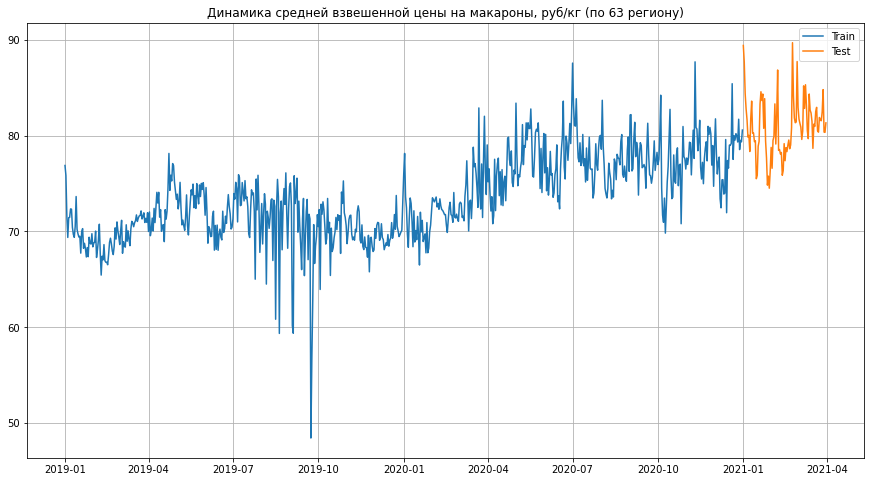

In [32]:
plt.figure(figsize=(15,8))
plt.plot(train_data['pasta_360'], label='Train')
plt.plot(test_data['pasta_360'], label='Test')
plt.grid(True)
plt.legend(loc='best')
plt.title('Динамика средней взвешенной цены на макароны, руб/кг (по 63 региону)')
plt.show()

In [33]:
dataset = train_data.to_numpy()

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [36]:
n_steps_in = 365
n_steps_out = test_period

In [37]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [38]:
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

In [39]:
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
n_features = X.shape[2]

In [40]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [41]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 363, 128)          2448128   
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 181, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 179, 64)           24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 89, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 87, 32)            6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 43, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 41, 16)            1

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [43]:
callbacks_list = [
#     ModelCheckpoint(filepath='best_model.epoch={epoch:02d}-val_loss={val_loss:.2f}.h5',
#                     monitor='val_loss',
#                     save_best_only=True),
    EarlyStopping(monitor='mae', patience=1)
]

In [44]:
%%time
model.fit(X, y, epochs=20, verbose=1, callbacks=callbacks_list)#, batch_size=30, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 187s 9s/step - loss: 0.1514 - mae: 0.3150
Epoch 2/20
9/9 [==============================] - 42s 5s/step - loss: 0.0315 - mae: 0.1301
Epoch 3/20
9/9 [==============================] - 26s 3s/step - loss: 0.0202 - mae: 0.1020
Epoch 4/20
9/9 [==============================] - 27s 3s/step - loss: 0.0180 - mae: 0.0952
Epoch 5/20
9/9 [==============================] - 26s 3s/step - loss: 0.0162 - mae: 0.0898
Epoch 6/20
9/9 [==============================] - 26s 3s/step - loss: 0.0133 - mae: 0.0796
Epoch 7/20
9/9 [==============================] - 26s 3s/step - loss: 0.0112 - mae: 0.0727
Epoch 8/20
9/9 [==============================] - 27s 3s/step - loss: 0.0102 - mae: 0.0682
Epoch 9/20
9/9 [==============================] - 25s 3s/step - loss: 0.0095 - mae: 0.0653
Epoch 10/20
9/9 [==============================] - 26s 3s/step - loss: 0.0093 - mae: 0.0646
Epoch 11/20
9/9 [==============================] - 29s 3s/step - loss: 0.0091 - mae: 0.0

In [45]:
x_input = dataset[-n_steps_in:, :]
x_input = x_input.reshape((1, n_steps_in, n_features))

In [46]:
yhat = model.predict(x_input, verbose=0)

In [47]:
yhat = yhat.reshape((n_steps_out, n_features))

In [48]:
yhat_ = scaler.inverse_transform(yhat)

In [49]:
index = test_data[:n_steps_out].index
columns = test_data.columns
data_pred = pd.DataFrame(data=yhat_, index=index, columns=columns)
data_pred

,pasta_10,legumes_10,bread_10,flour_10,rice_10,groats_10,potatoes_10,сucumbers_tomatoes_10,vegetables_10,roots_10,...,spice_value_990,tea_value_990,ai92_990,ai95_990,ai98_990,dt_990,ai92_value_990,ai95_value_990,ai98_value_990,dt_value_990
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,68.636597,71.228050,53.499710,29.771667,68.987167,55.016769,18.855648,106.727631,23.332048,33.341179,...,2961.986084,1774.800781,45.171810,46.813217,48.394455,52.633999,34014.878906,24707.017578,1974.394165,1895.913940
2021-01-02,68.621880,70.972282,53.390152,29.675421,68.137543,55.273796,18.464684,108.522247,23.913895,32.803623,...,3034.073242,1839.671387,45.224869,46.847065,48.245419,54.490631,33800.070312,23302.148438,1977.638428,1527.950439
2021-01-03,68.428986,69.877388,53.744167,29.504562,68.183739,54.631905,18.309305,107.418549,23.883881,33.484901,...,2950.658691,1841.456787,45.262630,46.845444,48.157825,55.450142,35469.937500,23995.611328,2090.831299,1828.692383
2021-01-04,68.920975,69.651596,53.361748,29.437624,67.971413,54.675232,18.444036,110.427422,24.066811,33.097553,...,2969.029541,1815.167725,45.220356,46.863274,48.438931,56.080605,34638.050781,24405.423828,2019.835327,1662.396484
2021-01-05,68.460304,69.419014,53.410130,29.692238,67.771049,55.214176,17.732088,110.226799,24.009029,32.656010,...,3105.125488,1897.334839,45.363201,46.895191,48.306625,55.814709,35254.691406,24089.281250,2157.663330,1394.836914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,67.271797,78.877747,52.693813,31.434359,73.554565,59.042915,17.304174,131.308792,33.470551,37.399960,...,3490.613525,1825.032715,45.717266,47.559460,49.486504,45.077507,26692.919922,17147.234375,1448.260010,-134.637741
2021-03-28,66.734741,78.945869,52.449612,31.463558,73.776817,58.742371,17.230116,131.640900,34.554340,37.418674,...,3544.917480,1796.252808,45.642727,47.481632,48.866592,45.664227,26419.566406,16798.990234,1608.017212,-286.364075
2021-03-29,66.811974,80.332054,52.706532,31.500689,73.449699,58.552475,17.754904,129.289383,34.834114,37.474663,...,3590.266113,1802.854980,45.734146,47.511284,48.540390,44.357403,26087.025391,16527.994141,1485.318726,-151.348312


In [50]:
columns = ['region', 'oktmo', 'okato', 'oktmo_small']
for column_name in columns_names:
    columns.append(column_name)

In [51]:
data_out = pd.DataFrame(columns=columns)
data_out

,region,oktmo,okato,oktmo_small,pasta,legumes,bread,flour,rice,groats,...,spice_value,tea_value,ai92,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value


In [52]:
for oktmo_num in data_reg['oktmo_small']:
    okato_num = data_reg[data_reg['oktmo_small'] == oktmo_num]['okato'].values[0]
    region_num = data_reg[data_reg['oktmo_small'] == oktmo_num]['region'].values[0]

    data_1 = pd.DataFrame(columns=columns)
    for column_name in columns_names:
        new_column_name = column_name + '_' + str(oktmo_num)
        data_1[column_name] = data_pred[new_column_name]

    data_1['oktmo_small'] = oktmo_num
    data_1['oktmo'] = oktmo_num * 100000000
    data_1['okato'] = okato_num
    data_1['region'] = region_num
    
    data_out = pd.concat([data_out, data_1])

data_out.index.name='date'
data_out = data_out.sort_values(by=['date', 'oktmo'])
data_out

,region,oktmo,okato,oktmo_small,pasta,legumes,bread,flour,rice,groats,...,spice_value,tea_value,ai92,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,21,1000000000,1000000000,10,68.636597,71.228050,53.499710,29.771667,68.987167,55.016769,...,16517.449219,19180.701172,41.413731,44.606075,37.320019,46.778595,3.193962e+05,1.619589e+05,181.719055,115317.828125
2021-01-01,23,3000000000,3000000000,30,82.334160,108.030190,76.145409,33.761501,75.915115,59.978802,...,83391.546875,92360.234375,42.949699,48.185982,51.717171,45.890686,2.651408e+06,1.834638e+06,2270.737061,801354.937500
2021-01-01,24,4000000000,4000000000,40,86.604240,110.276459,76.333069,32.258537,80.149231,52.896473,...,62647.437500,43182.542969,42.085396,44.793465,52.344658,50.997536,5.984654e+05,4.791767e+05,13566.397461,93443.523438
2021-01-01,25,5000000000,5000000000,50,89.525299,128.473267,81.633385,40.054203,70.694527,60.379112,...,35807.078125,28019.058594,45.309818,45.722969,48.315224,50.329384,6.805029e+05,8.066676e+05,81036.132812,80513.187500
2021-01-01,26,7000000000,7000000000,70,77.282478,94.564461,64.705719,31.690916,74.469666,60.315578,...,25343.349609,28745.679688,42.204716,48.141701,47.300186,46.727203,7.988201e+05,4.337161e+05,129.256378,185856.781250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,19,95000000000,95000000000,950,77.141426,107.782593,65.388817,25.855366,68.396210,48.243141,...,10531.702148,5783.841309,41.062469,43.764503,48.192291,48.965244,1.538187e+05,9.963085e+04,5884.667480,6203.671875
2021-03-31,20,96000000000,96000000000,960,77.494453,17.531471,117.010101,5.253221,13.964836,49.331051,...,449.975891,484.750031,26.129284,34.771053,32.184647,34.492889,1.082854e+03,8.740078e+02,131.803070,415.952698
2021-03-31,21,97000000000,97000000000,970,67.144318,80.678078,52.966915,31.790831,73.888519,58.581406,...,16982.632812,16168.283203,41.010078,44.814823,-0.163692,46.475681,2.408784e+05,1.089041e+05,-8.470543,100118.039062


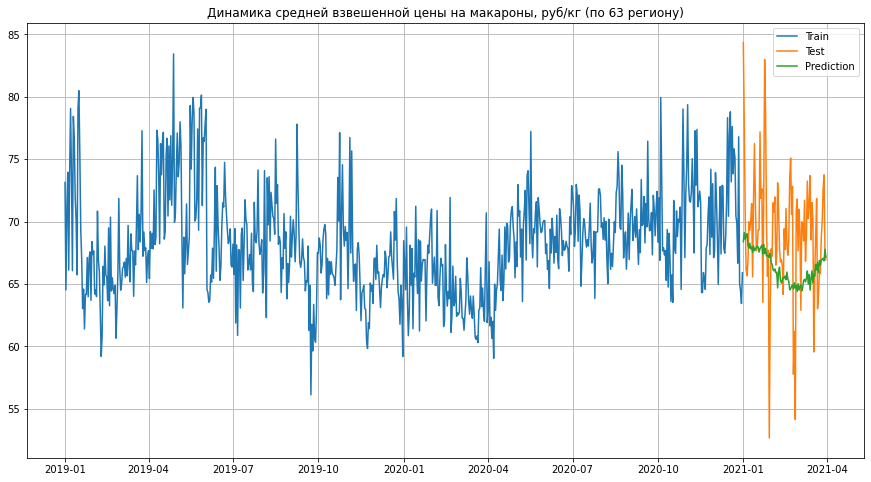

In [55]:
plt.figure(figsize=(15,8))
plt.plot(train_data['pasta_360'], label='Train')
plt.plot(test_data['pasta_360'], label='Test')
plt.plot(data_out[data_out['oktmo_small'] == 360]['pasta'], label='Prediction')
plt.grid(True)
plt.legend(loc='best')
plt.title('Динамика средней взвешенной цены на макароны, руб/кг (по 63 региону)')
plt.show()

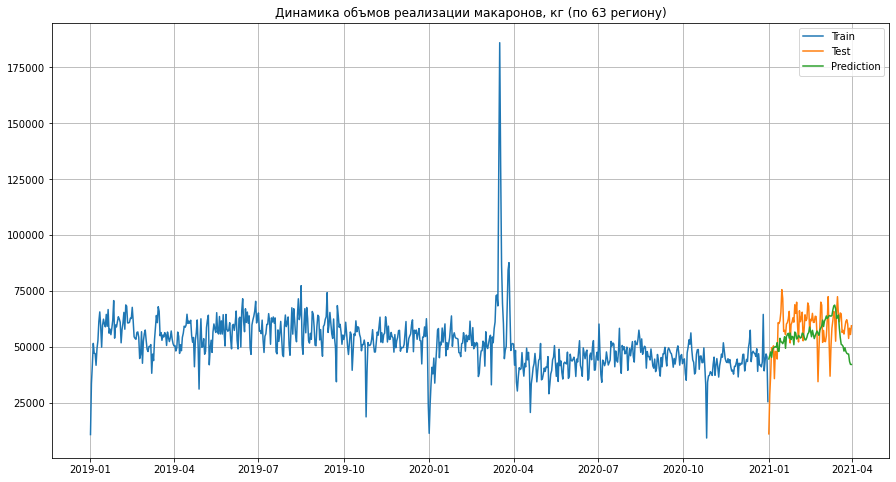

In [54]:
plt.figure(figsize=(15,8))
plt.plot(train_data['pasta_value_360'], label='Train')
plt.plot(test_data['pasta_value_360'], label='Test')
plt.plot(data_out[data_out['oktmo_small'] == 360]['pasta_value'], label='Prediction')
plt.grid(True)
plt.legend(loc='best')
plt.title('Динамика объмов реализации макаронов, кг (по 63 региону)')
plt.show()